# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[corn_params],
        shape_gene_pool=[
            double_parabolic_params,
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 24, Population: 452, Unique population: 167, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON 

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 30, Population: 420, Unique population: 165, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON 

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 34, Population: 388, Unique population: 98, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

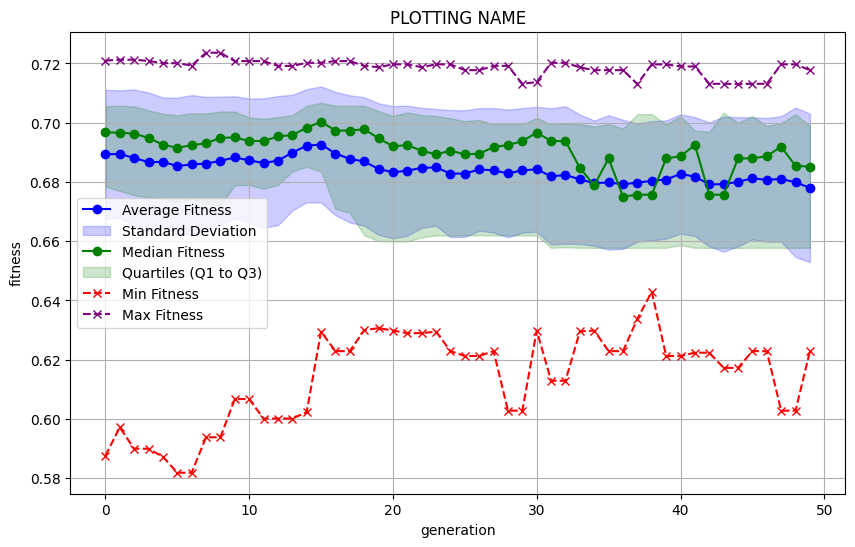

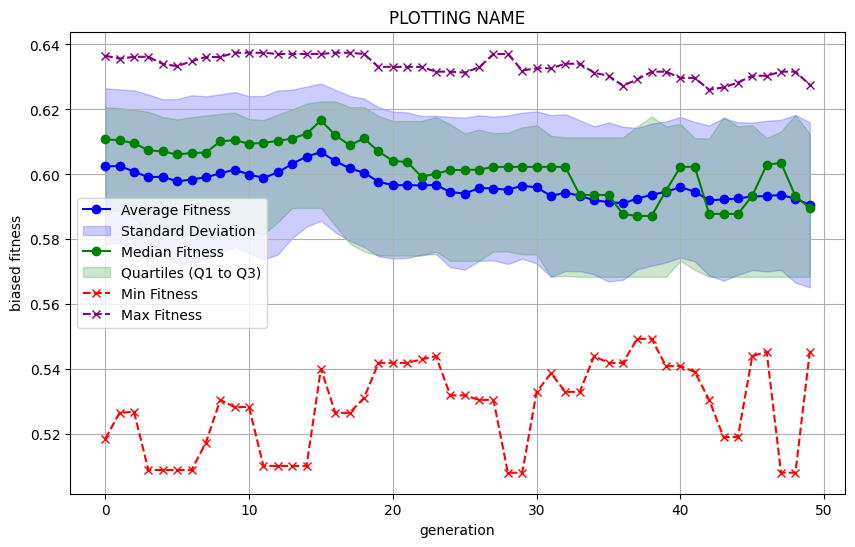

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_22: ['TriangleShape_326', 'CornerTransformation_1']
predict: (0.28982054352518527, 373.2535100999999, 456.8995685000001)
biased_fitness: 0.6124457031474062, fitness: 0.701029171748147
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


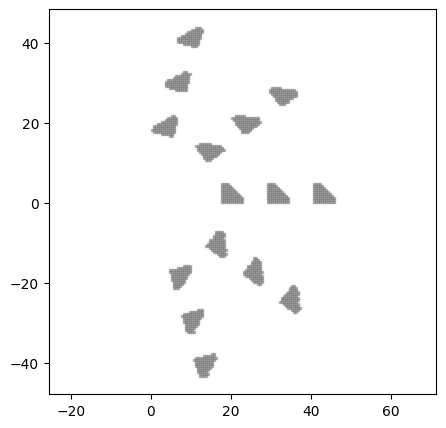

--------------------------------------------------
label: VentHole Chromosome_22: ['TriangleShape_22', 'CornerTransformation_84']
predict: (0.29004337264888624, 373.18483050000015, 459.81548789999977)
biased_fitness: 0.6038376546155921, fitness: 0.6845646815111378
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


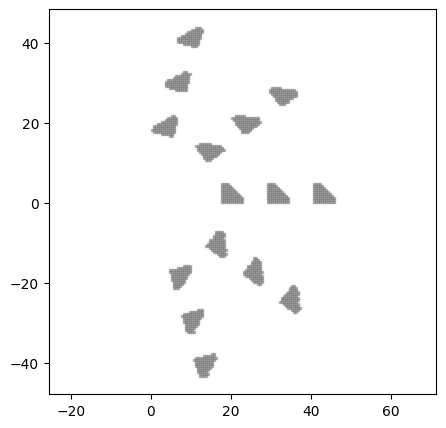

--------------------------------------------------
label: VentHole Chromosome_53: ['CircleShape_444', 'CornerTransformation_22']
predict: (0.2898163401835905, 373.99994919999995, 458.81350149999975)
biased_fitness: 0.6049444884297339, fitness: 0.6877693446640966
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


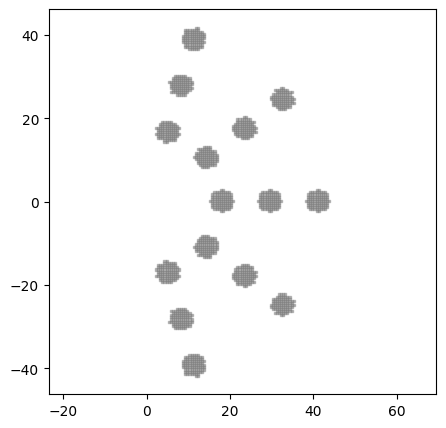

--------------------------------------------------
label: VentHole Chromosome_47: ['CircleShape_53', 'CornerTransformation_22']
predict: (0.28962985767558114, 373.76454779999983, 457.6422561999999)
biased_fitness: 0.611074741141865, fitness: 0.6966674032441899
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


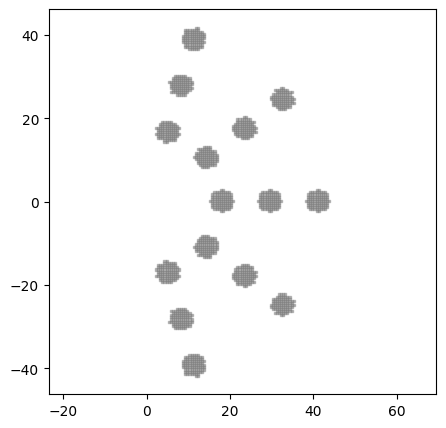

--------------------------------------------------
label: VentHole Chromosome_444: ['CircleShape_218', 'CornerTransformation_444']
predict: (0.28898645610528373, 373.20846309999985, 456.2096899999997)
biased_fitness: 0.6257279190260291, fitness: 0.7130446734471649
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


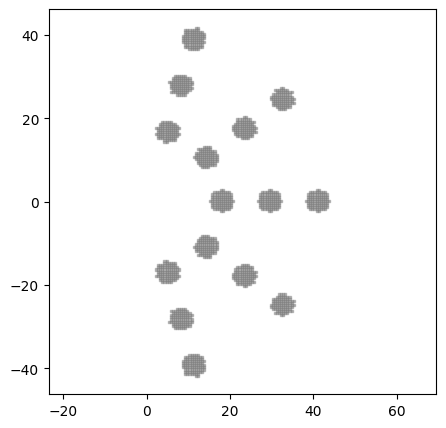

--------------------------------------------------
label: VentHole Chromosome_22: ['HoleShape_53', 'CornerTransformation_326']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


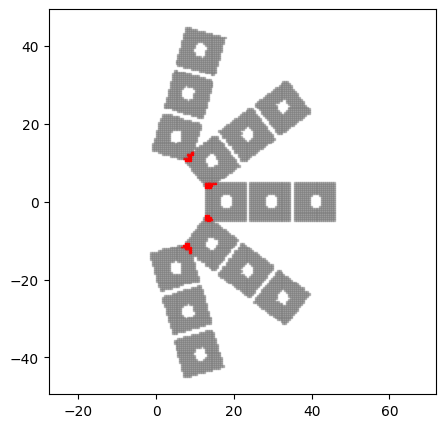

--------------------------------------------------
label: VentHole Chromosome_47: ['HoleShape_22', 'CornerTransformation_22']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


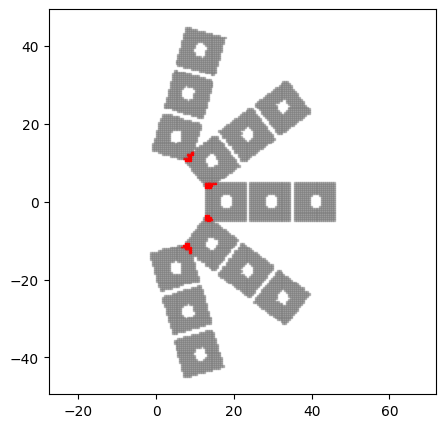

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_53', 'CornerTransformation_53']
predict: (0.2918103133189982, 373.7176574, 459.83007319999984)
biased_fitness: 0.5764071801340253, fitness: 0.6641582138100186
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


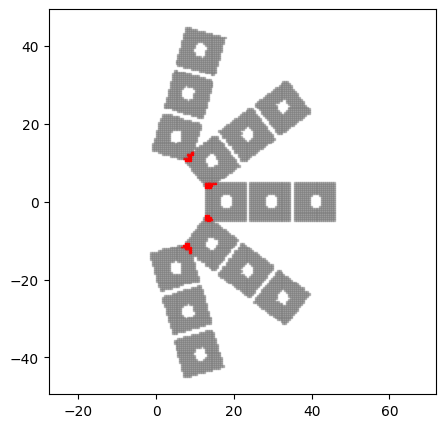

--------------------------------------------------
label: VentHole Chromosome_84: ['HoleShape_47', 'CornerTransformation_47']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


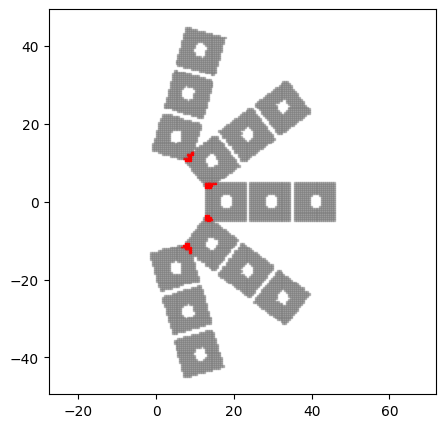

--------------------------------------------------
label: VentHole Chromosome_444: ['CircleShape_84', 'CornerTransformation_53']
predict: (0.28962985767558114, 373.76454779999983, 457.6422561999999)
biased_fitness: 0.611074741141865, fitness: 0.6966674032441899
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


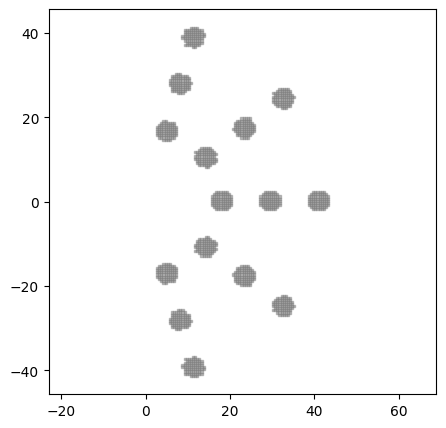

--------------------------------------------------
label: VentHole Chromosome_435: ['HoleShape_84', 'CornerTransformation_454']
predict: (0.29232318305002924, 373.7522135999997, 460.2354569999998)
biased_fitness: 0.5682434552995921, fitness: 0.6568298164997096
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


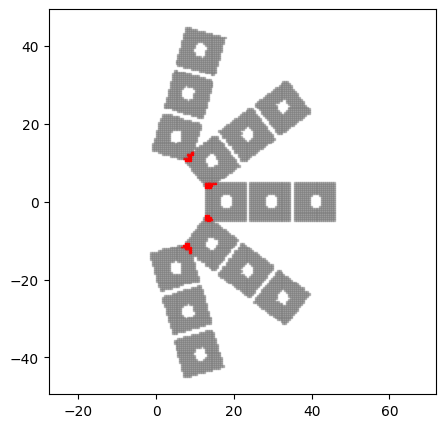

--------------------------------------------------
label: VentHole Chromosome_47: ['TriangleShape_22', 'CornerTransformation_53']
predict: (0.289706359192653, 373.1038495999999, 456.9024170999999)
biased_fitness: 0.6147868891028591, fitness: 0.7029050745734712
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


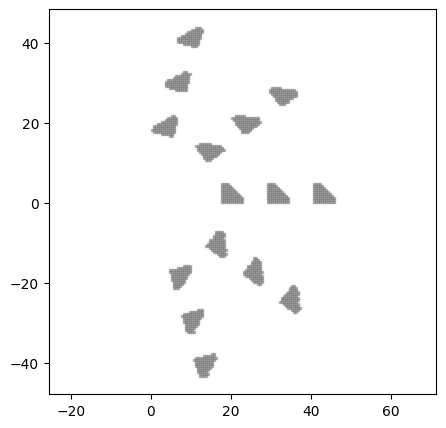

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_22', 'CornerTransformation_444']
predict: (0.2912741290079284, 374.4113196000001, 460.46999349999976)
biased_fitness: 0.5791656088890025, fitness: 0.6628521444207167
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


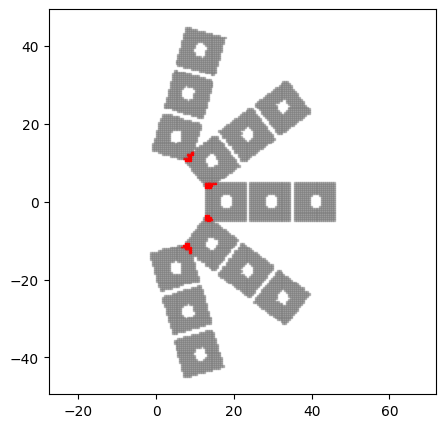

--------------------------------------------------
label: VentHole Chromosome_454: ['HoleShape_53', 'CornerTransformation_84']
predict: (0.29275571218559016, 373.89486949999997, 460.73411759999976)
biased_fitness: 0.5604774467017383, fitness: 0.6492979426440997
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


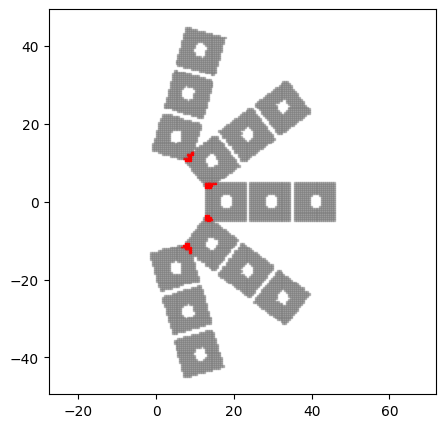

--------------------------------------------------
label: VentHole Chromosome_22: ['HoleShape_1', 'CornerTransformation_130']
predict: (0.29065191208833574, 374.0506461000001, 458.60034959999973)
biased_fitness: 0.5934193010632994, fitness: 0.6802259006166432
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


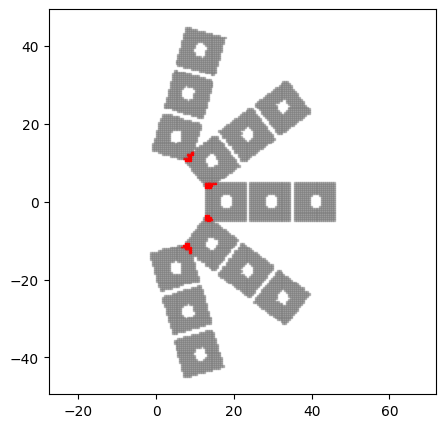

--------------------------------------------------
label: VentHole Chromosome_22: ['TriangleShape_47', 'CornerTransformation_53']
predict: (0.28955786861189003, 373.25830859999985, 458.22336869999975)
biased_fitness: 0.6134515590335406, fitness: 0.6970129273811015
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


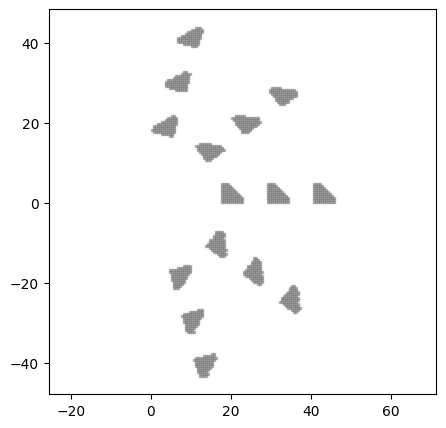

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_454', 'CornerTransformation_22']
predict: (0.29271204420452546, 373.7531772, 459.3339621)
biased_fitness: 0.5645975709366435, fitness: 0.6574438614547453
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


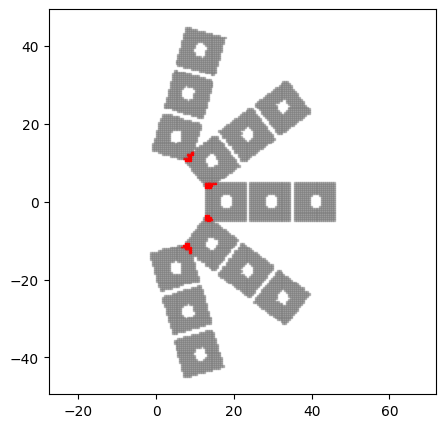

--------------------------------------------------
label: VentHole Chromosome_47: ['HoleShape_53', 'CornerTransformation_53']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


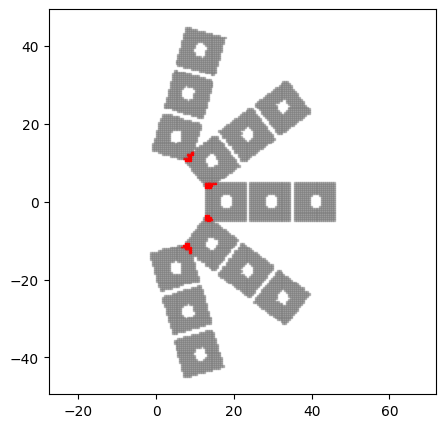

--------------------------------------------------
label: VentHole Chromosome_53: ['RayShape_84', 'CornerTransformation_1']
predict: (0.29079942990398355, 373.1658623999999, 455.3335677)
biased_fitness: 0.6023115339442305, fitness: 0.6995085504601648
shape parameter:
parameter_list: [ upper_slope: 2.035984060580917, nose_point: 2.0531767105750105, lower_coefficient: 3.389903028710148, lower_x-intercept: 3.6788146298521953, lower_y-intercept: 1.5504202619263747, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


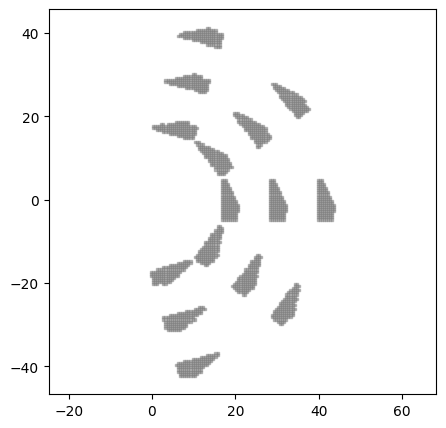

--------------------------------------------------
label: VentHole Chromosome_84: ['CircleShape_130', 'CornerTransformation_53']
predict: (0.2899016653097224, 373.86950599999994, 458.58936719999974)
biased_fitness: 0.6048504212638872, fitness: 0.6886889809027775
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


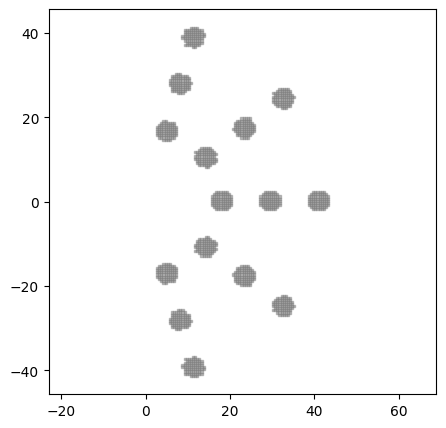

--------------------------------------------------
label: VentHole Chromosome_46: ['CircleShape_22', 'CornerTransformation_84']
predict: (0.2890699983857543, 373.6465404999999, 457.0453287000001)
biased_fitness: 0.6206966626994398, fitness: 0.7058406701424569
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


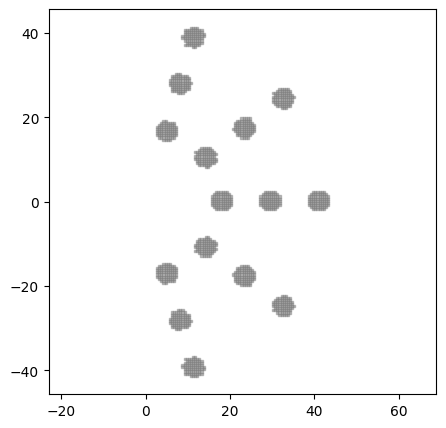

--------------------------------------------------
label: VentHole Chromosome_454: ['HoleShape_444', 'CornerTransformation_22']
predict: (0.29244608063378186, 373.55315129999985, 460.15660469999995)
biased_fitness: 0.5676759052270546, fitness: 0.6569904136621822
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


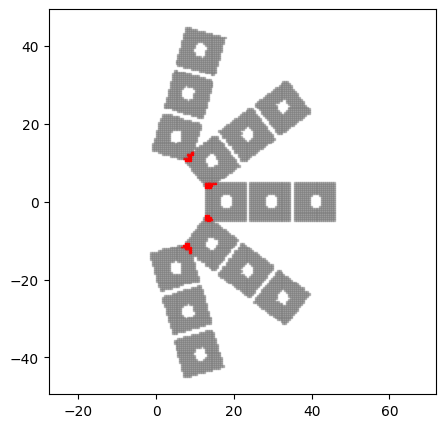

--------------------------------------------------
label: VentHole Chromosome_454: ['CircleShape_46', 'CornerTransformation_53']
predict: (0.2888874156021799, 373.4052369999999, 456.9387015)
biased_fitness: 0.6246725935694819, fitness: 0.7094061514782016
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


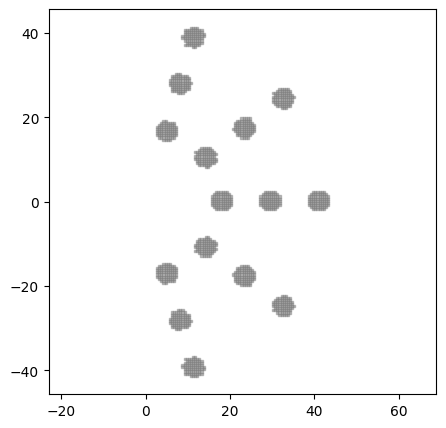

--------------------------------------------------
label: VentHole Chromosome_435: ['HoleShape_454', 'CornerTransformation_53']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


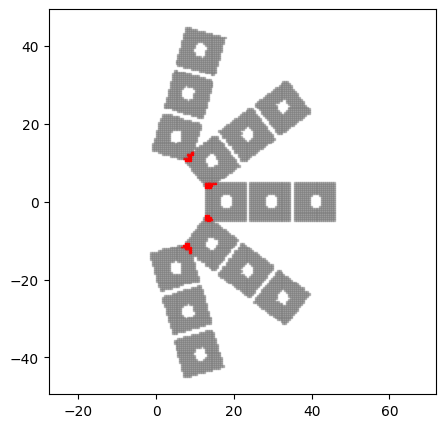

--------------------------------------------------
label: VentHole Chromosome_444: ['CircleShape_53', 'CornerTransformation_53']
predict: (0.2896209755773438, 373.2278307000002, 457.4835863999999)
biased_fitness: 0.614200015617186, fitness: 0.7002331587265613
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


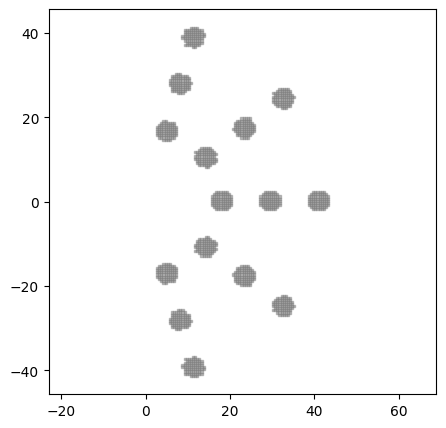

--------------------------------------------------
label: VentHole Chromosome_53: ['TriangleShape_53', 'CornerTransformation_22']
predict: (0.28953129448958936, 373.3870241999999, 456.2064970999999)
biased_fitness: 0.6172137619457494, fitness: 0.7067194486041071
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


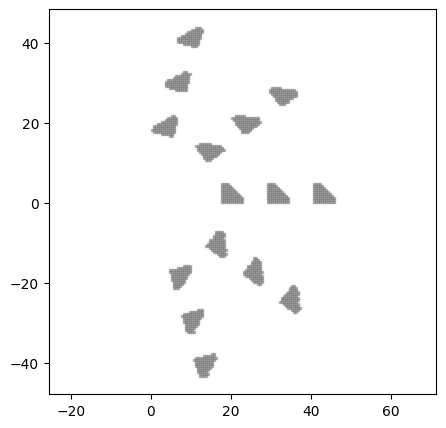

--------------------------------------------------
label: VentHole Chromosome_130: ['DoubleParabolicShape_1', 'CornerTransformation_22']
predict: (0.2898302020575305, 373.5605249999999, 456.64425639999985)
biased_fitness: 0.6112860333945733, fitness: 0.7006740724246959
shape parameter:
parameter_list: [ lower_coefficient: 2.363764308705891, upper_coefficient: 2.0291196236090006, lower_y-intercept: 1.902298609307638, upper_y-intercept_from_lower_y: 1.4441423083293738, lower_x_trans: 1.3892297405876628, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


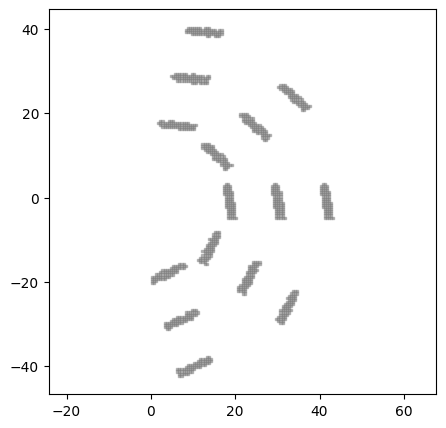

--------------------------------------------------
label: VentHole Chromosome_454: ['CircleShape_22', 'CornerTransformation_22']
predict: (0.2892052481642029, 373.4381230000001, 457.45200930000004)
biased_fitness: 0.6190318921011588, fitness: 0.7034968568579703
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


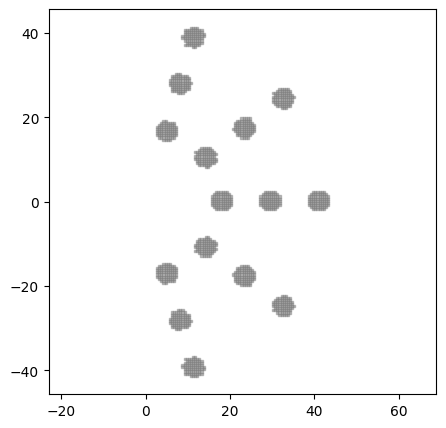

--------------------------------------------------
label: VentHole Chromosome_22: ['TrapezoidShape_53', 'CornerTransformation_22']
predict: (0.2916563612104621, 374.06511170000005, 461.54146069999996)
biased_fitness: 0.5734024631535299, fitness: 0.6554035258953786
shape parameter:
parameter_list: [ k1: 3.8317999193341508, k2: 2.3810922219107704, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


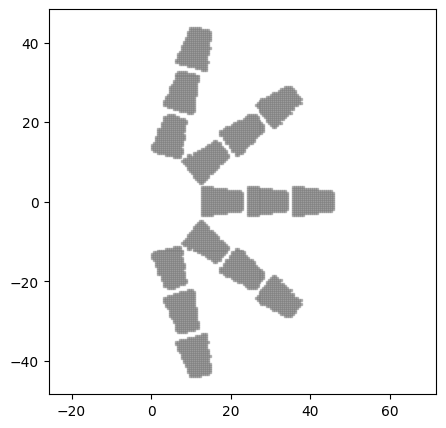

--------------------------------------------------
label: VentHole Chromosome_454: ['CircleShape_22', 'CornerTransformation_22']
predict: (0.28962985767558114, 373.76454779999983, 457.6422561999999)
biased_fitness: 0.611074741141865, fitness: 0.6966674032441899
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.4787243696492021, rot_count: 3.0, ]


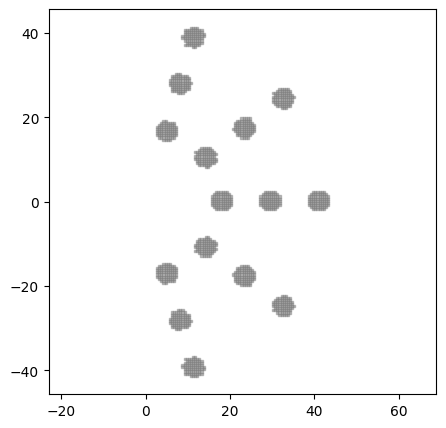

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_196', 'CornerTransformation_22']
predict: (0.29389419513165427, 373.6588702999998, 457.76546979999983)
biased_fitness: 0.5516559770568413, fitness: 0.6539363481834589
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


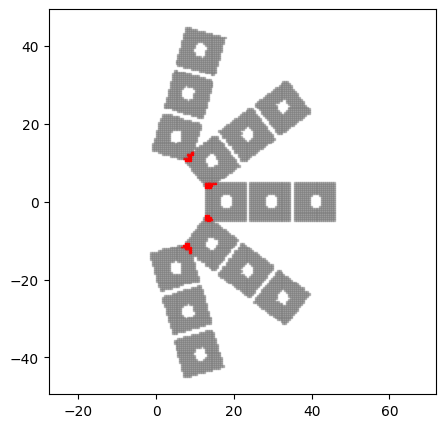

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_22', 'CornerTransformation_130']
predict: (0.29314259764432116, 374.7034565000002, 460.42764869999996)
biased_fitness: 0.5516310530795028, fitness: 0.6429184975567875
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


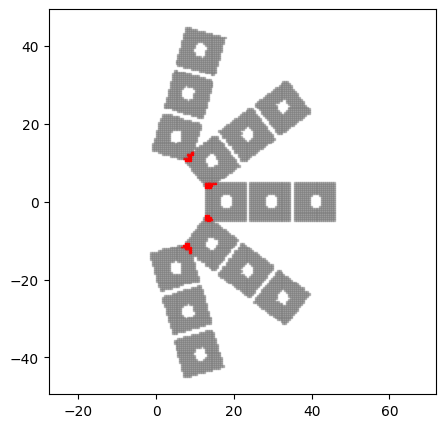

--------------------------------------------------
label: VentHole Chromosome_53: ['CircleShape_196', 'CornerTransformation_435']
predict: (0.2898252391596132, 373.7881978999999, 457.43651589999985)
biased_fitness: 0.6086326304654156, fitness: 0.695624039403869
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


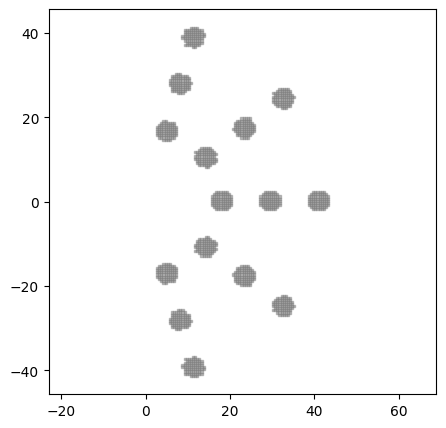

--------------------------------------------------
label: VentHole Chromosome_454: ['CircleShape_22', 'CornerTransformation_53']
predict: (0.28895881489776576, 373.41328689999995, 457.527491)
biased_fitness: 0.6224551749312794, fitness: 0.7057079615223425
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


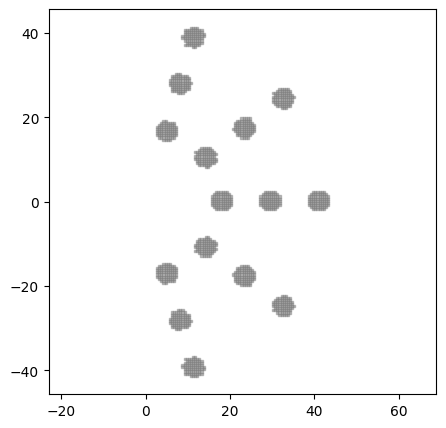

--------------------------------------------------
label: VentHole Chromosome_22: ['RayShape_53', 'CornerTransformation_22']
predict: (0.29115052014870724, 373.85289479999994, 458.70679529999984)
biased_fitness: 0.5872146533180991, fitness: 0.6756963480129285
shape parameter:
parameter_list: [ upper_slope: 2.035984060580917, nose_point: 2.0531767105750105, lower_coefficient: 3.389903028710148, lower_x-intercept: 3.6788146298521953, lower_y-intercept: 1.5504202619263747, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


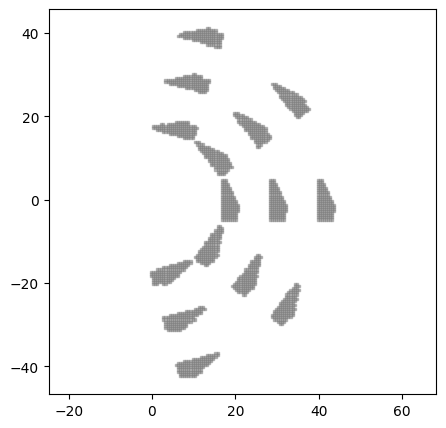

--------------------------------------------------
label: VentHole Chromosome_22: ['CircleShape_84', 'CornerTransformation_53']
predict: (0.28959521389796805, 373.3194744999999, 458.12269609999987)
biased_fitness: 0.6128242407284479, fitness: 0.6968370080203206
shape parameter:
parameter_list: [ r: 2.326838309609009, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


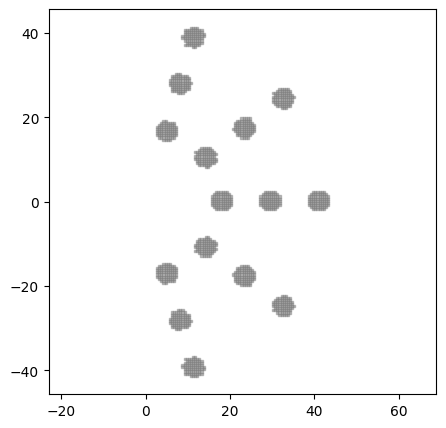

--------------------------------------------------
label: VentHole Chromosome_130: ['HoleShape_22', 'CornerTransformation_53']
predict: (0.29170155800348385, 373.8974244999999, 458.8882566999997)
biased_fitness: 0.5789145520512271, fitness: 0.6690560139651635
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


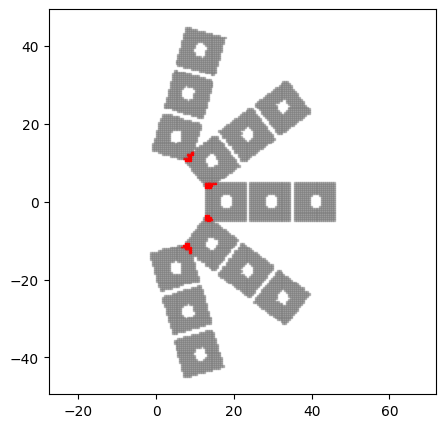

--------------------------------------------------
label: VentHole Chromosome_46: ['HoleShape_53', 'CornerTransformation_130']
predict: (0.29232318305002924, 373.7522135999997, 460.2354569999998)
biased_fitness: 0.5682434552995921, fitness: 0.6568298164997096
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


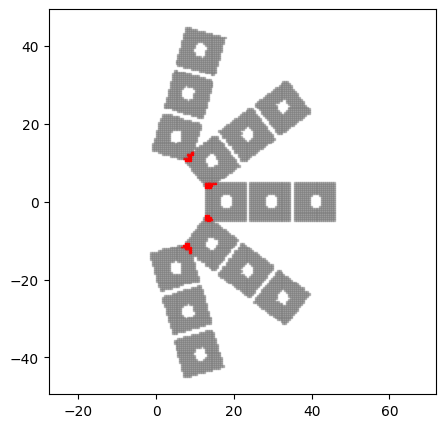

--------------------------------------------------
label: VentHole Chromosome_22: ['HoleShape_47', 'CornerTransformation_22']
predict: (0.29235965466462766, 373.6779325999999, 460.0516404999999)
biased_fitness: 0.5684718906952133, fitness: 0.6577555878537242
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


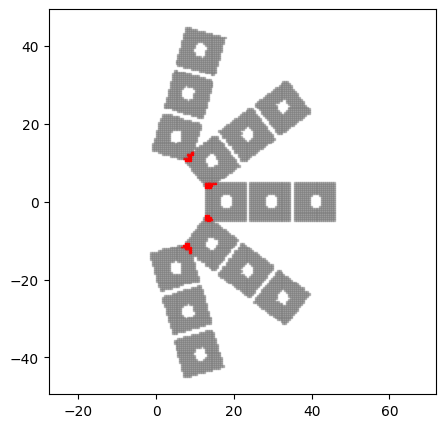

--------------------------------------------------
label: VentHole Chromosome_53: ['HoleShape_130', 'CornerTransformation_53']
predict: (0.29368563998571595, 374.73838759999984, 459.65132800000015)
biased_fitness: 0.545406446199977, fitness: 0.6411950221428404
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


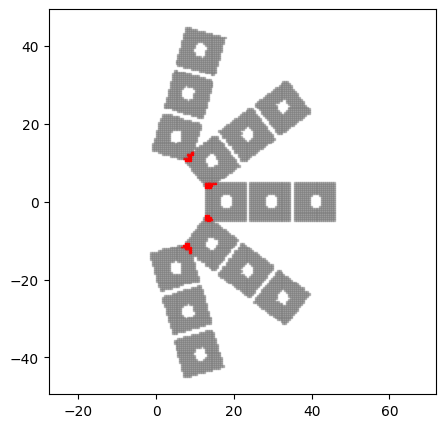

--------------------------------------------------
label: VentHole Chromosome_326: ['TriangleShape_22', 'CornerTransformation_47']
predict: (0.2900281004387728, 373.11310650000013, 459.53412039999967)
biased_fitness: 0.6049728205571806, fitness: 0.6864828611122729
shape parameter:
parameter_list: [ l: 5.694164537084934, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


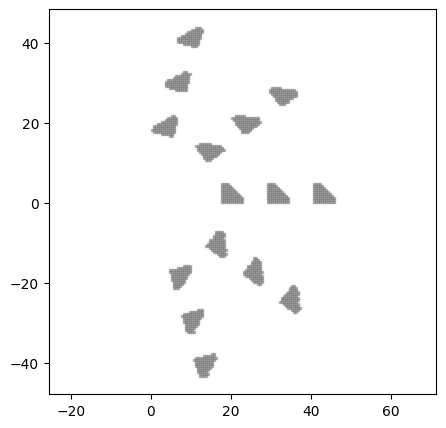

--------------------------------------------------
label: VentHole Chromosome_1: ['HoleShape_130', 'CornerTransformation_53']
predict: (0.2927692850474608, 373.83018639999995, 458.1049107999998)
biased_fitness: 0.5658692557355494, fitness: 0.6626316635253932
shape parameter:
parameter_list: [ hole_r: 3.252619726534685, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


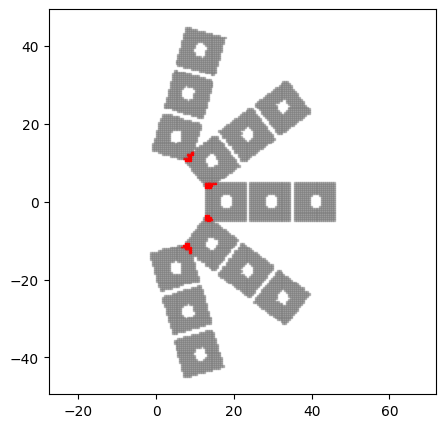

--------------------------------------------------
label: VentHole Chromosome_53: ['TrapezoidShape_22', 'CornerTransformation_22']
predict: (0.29249042998995334, 373.6854587999999, 461.63489789999994)
biased_fitness: 0.5634368903406538, fitness: 0.6484939166004674
shape parameter:
parameter_list: [ k1: 3.8317999193341508, k2: 2.3810922219107704, ]
pattern parameter:
parameter_list: [ di: 12.561266618100987, dx: 1.5379867726590088, phi: 0.33143343977191697, rot_count: 3.0, ]


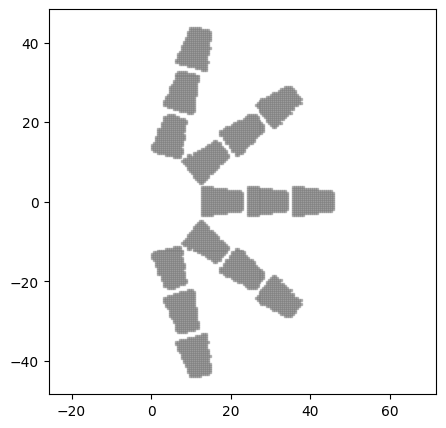

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )